# ECG Heartbeat Categorization - ETL - Extract, Transform, Load
Preparation for analytics

### Data Cleaning Checks
#### * Data types
Check data types for correctness
#### * Ranges
Value distributions
#### * Uniqueness
Check for undesireable duplicates

## Imports

In [1]:
# imports
import numpy as np
import pandas as pd
#!pip install pandas-profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Download Data

In [2]:
data_ecg = pd.read_csv('data_ecg.csv')
data_ecg

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
data_ecg.shape

(87553, 188)

In [4]:
data_ecg.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
183      float64
184      float64
185      float64
186      float64
label    float64
Length: 188, dtype: object

In [5]:
data_ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 125.6 MB


#### Check for missing values

In [6]:
#Missing values
print("Missing values:",data_ecg.isna().sum().sum())

Missing values: 0


#### Statistical measures

In [7]:
data_ecg.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
1,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
2,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
3,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
4,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
185,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87553.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


#### Class Distributions

<AxesSubplot:xlabel='label', ylabel='Count'>

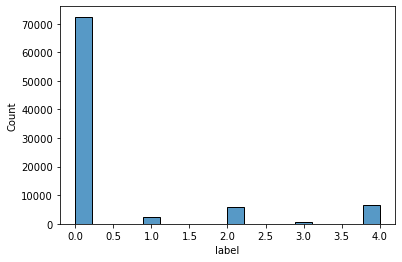

In [8]:
# Classes
sns.histplot(data_ecg.label)

#### Check for uniqueness - undesireable duplicates

In [9]:
print(f'Data has {data_ecg.shape[0]} rows. Number of unique rows is {data_ecg.nunique()}.')

Data has 87553 rows. Number of unique rows is 0        23408
1        42845
2        49611
3        41007
4        39328
         ...  
183        920
184        843
185        778
186        748
label        5
Length: 188, dtype: int64.


## Sample the dataset for prototyping

In [10]:
# Random sample of the data for prototyping

test_ecg = data_ecg.sample(1000, random_state=1,axis=0).reset_index(drop=True)
test_ecg

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,label
0,1.000000,0.853261,0.394022,0.125000,0.089674,0.092391,0.081522,0.046196,0.038043,0.040761,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.938511,0.695793,0.051780,0.067961,0.100324,0.100324,0.087379,0.080906,0.087379,0.077670,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.124309,0.254144,0.383978,0.464088,0.574586,0.687845,0.745856,0.745856,0.756906,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.083810,0.000000,0.062857,0.236190,0.365714,0.438095,0.489524,0.514286,0.560000,0.622857,...,0.695238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.926877,0.872530,0.806324,0.722332,0.604743,0.474308,0.373518,0.302372,0.243083,0.199605,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.963043,0.773913,0.610870,0.426087,0.434783,0.445652,0.491304,0.513043,0.513043,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,1.000000,0.985437,0.786408,0.519417,0.286408,0.165049,0.160194,0.150485,0.145631,0.150485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.971154,0.747596,0.168269,0.060096,0.064904,0.036058,0.012019,0.021635,0.000000,0.060096,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.997028,0.851412,0.285290,0.040119,0.267459,0.350669,0.313522,0.300149,0.313522,0.319465,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_ecg.shape

(1000, 188)

In [12]:
test_ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 1.4 MB


In [13]:
test_ecg.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
183      float64
184      float64
185      float64
186      float64
label    float64
Length: 188, dtype: object

#### Check for missing values

In [15]:
#Missing values
print("Missing values:",test_ecg.isna().sum().sum())

Missing values: 0


#### Statistical measures

In [16]:
test_ecg.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1000.0,0.890045,0.241793,0.0,0.921966,0.991234,1.000000,1.000000
1,1000.0,0.750103,0.231602,0.0,0.668406,0.821479,0.909450,1.000000
2,1000.0,0.416841,0.229676,0.0,0.239103,0.416682,0.573961,1.000000
3,1000.0,0.215341,0.210190,0.0,0.044838,0.153603,0.329239,0.974576
4,1000.0,0.202303,0.182245,0.0,0.078989,0.144878,0.268450,1.000000
...,...,...,...,...,...,...,...,...
183,1000.0,0.002492,0.028776,0.0,0.000000,0.000000,0.000000,0.435233
184,1000.0,0.002525,0.028927,0.0,0.000000,0.000000,0.000000,0.433180
185,1000.0,0.002651,0.029934,0.0,0.000000,0.000000,0.000000,0.404145
186,1000.0,0.002322,0.028075,0.0,0.000000,0.000000,0.000000,0.409326


#### Class Distributions

<AxesSubplot:xlabel='label', ylabel='Count'>

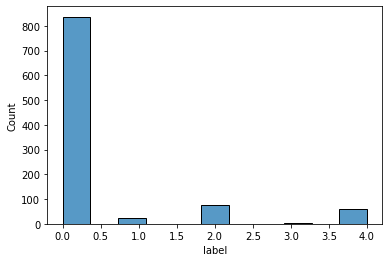

In [17]:
# Classes
sns.histplot(test_ecg.label)

#### Check for uniqueness - undesireable duplicates

In [18]:
print(f'Data has {test_ecg.shape[0]} rows. Number of unique rows is {test_ecg.nunique()}.')

Data has 1000 rows. Number of unique rows is 0        508
1        944
2        962
3        860
4        922
        ... 
183        9
184        9
185        9
186        8
label      5
Length: 188, dtype: int64.


## Save the sampled dataset

In [19]:
# Save to csv
test_ecg.to_csv('test_ecg.csv', index=False)

In [21]:
# Sanity check
test_ecg = pd.read_csv('test_ecg.csv')
test_ecg.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.938511,0.000000,0.083810,0.926877,1.000000,1.000000,1.000000,1.000000,0.946237,...,0.8925,1.000000,0.997890,0.804762,0.991404,1.000000,1.000000,0.971154,0.997028,0.763492
1,0.853261,0.695793,0.124309,0.000000,0.872530,0.845238,0.787535,0.908046,0.924479,0.561828,...,0.7900,0.884550,0.909283,0.814286,0.773639,0.963043,0.985437,0.747596,0.851412,0.700000
2,0.394022,0.051780,0.254144,0.062857,0.806324,0.535714,0.614731,0.593870,0.679688,0.408602,...,0.1775,0.502547,0.356540,0.323810,0.103152,0.773913,0.786408,0.168269,0.285290,0.614286
3,0.125000,0.067961,0.383978,0.236190,0.722332,0.182540,0.376771,0.111111,0.427083,0.263441,...,0.0675,0.356537,0.006329,0.057143,0.002865,0.610870,0.519417,0.060096,0.040119,0.511111
4,0.089674,0.100324,0.464088,0.365714,0.604743,0.134921,0.277620,0.000000,0.351562,0.166667,...,0.0675,0.298812,0.154008,0.076190,0.134670,0.426087,0.286408,0.064904,0.267459,0.368254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Note:
* #### data_ecg is for full train and test
* #### test_ecg is for prototyping - contains 1000 samples